In [ ]:
there is only one way to find solution of log loss function that is by gradient descent

new_b=b-lr*slope w.r.t p
      y*1/p+1+y*1/(1-p)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,random_state=42)
y

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

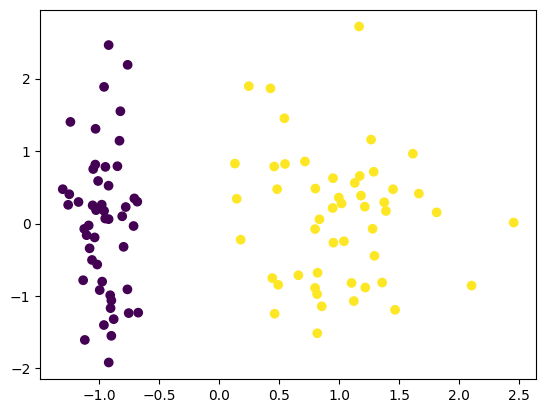

In [3]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [67]:
class logisticGD:
    def __init__(self,lr,epochs):
        self.lr=lr
        self.epochs=epochs
        self.weights=None

    def activateSigmoid(self,i):
        return 1/(1+np.exp(i))

    def activate(self,i):
        return 1 if i>0.5 else 0
        
    def fit(self,X,y):
        X=np.insert(X,0,1,axis=1)
        
        self.weights=np.ones(X.shape[1])
        print(self.weights)
        for i in range(self.epochs):
            
            i=np.random.randint(0,len(X))
            
            y_hat=[self.activateSigmoid(i) for i in X @ self.weights]

            self.weights=self.weights + self.lr/(X.shape[0]-1) * ( ( y - y_hat ).T @  X ).T

        print(self.weights)
        return self.weights
        
    def predict(self,X):
        X=np.insert(X,0,1,axis=1)
        return [ self.activate(i)  for i in X @ self.weights ]

In [81]:
pr=logisticGD(0.01,3000)
wts=pr.fit(X_train,y_train)
y_pred=pr.predict(X_test)
accuracy_score(y_pred,y_test)

[1. 1. 1.]
[ 1.6404288  30.31821913  1.91015566]


1.0

[np.float64(0.9632681731205018), np.float64(9.841740366718193), np.float64(0.08894430892095889)]


C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


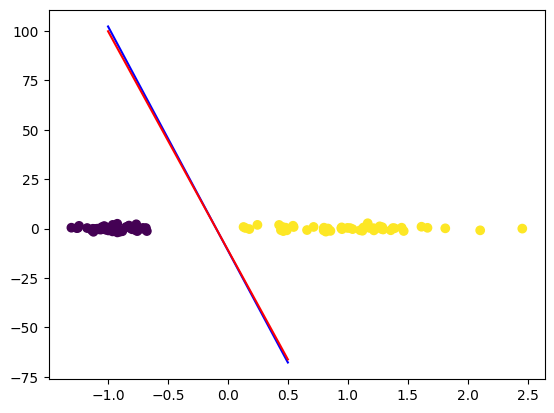

In [76]:
# comparision between our and sklearns line 

x=np.linspace(-1,0.5,100)

# w0+w1x+w2y=0

coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
plt.plot(x,x * coef +intercept,"b-")
plt.scatter(x=X[:,0],y=X[:,1],c=y)

from sklearn.linear_model import LogisticRegression

reg=LogisticRegression(penalty=None , solver="sag")

reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)

x=np.linspace(-1,0.5,100)

wts=[i for i in reg.intercept_]+[j for i in reg.coef_ for j in i]

print(wts)
coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
plt.plot(x,x * coef +intercept,"r-")

In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

1.0